In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clean_path = "../data/drafted_cleaned.csv"
df = pd.read_csv(clean_path)


In [3]:
# WS reali
df_ws = df[df["WS_available"] == 1]
df_vorp = df[df["VORP_available"] == 1]

#Calcolo valore per anno
ws_by_year = df_ws.groupby("DraftYear")["WS"].sum()
#Somma del VORP per anno
vorp_by_year = df_vorp.groupby("DraftYear")["VORP"].sum()

Dataframe combinato:

In [4]:
value_by_year = pd.DataFrame({
    "Total_WS": ws_by_year,
    "Total_VORP": vorp_by_year
})


In [5]:
#Top 10 anni migliori ordinati in base al WS
value_by_year.sort_values("Total_WS", ascending=False).head(10)


,Total_WS,Total_VORP
DraftYear,,
1985,1707.4,426.8
1984,1552.8,501.5
1996,1464.3,411.2
2003,1456.7,430.6
2008,1400.8,327.4
1998,1371.0,364.7
2009,1348.2,414.0
2005,1343.5,332.3
1987,1338.8,397.1


In [6]:
#Top 10 anni migliori ordinati in base al VORP
value_by_year.sort_values("Total_VORP", ascending=False).head(10)


,Total_WS,Total_VORP
DraftYear,,
1984,1552.8,501.5
2003,1456.7,430.6
1985,1707.4,426.8
1999,1311.9,415.7
2009,1348.2,414.0
1996,1464.3,411.2
1987,1338.8,397.1
1998,1371.0,364.7
2011,1289.6,340.4


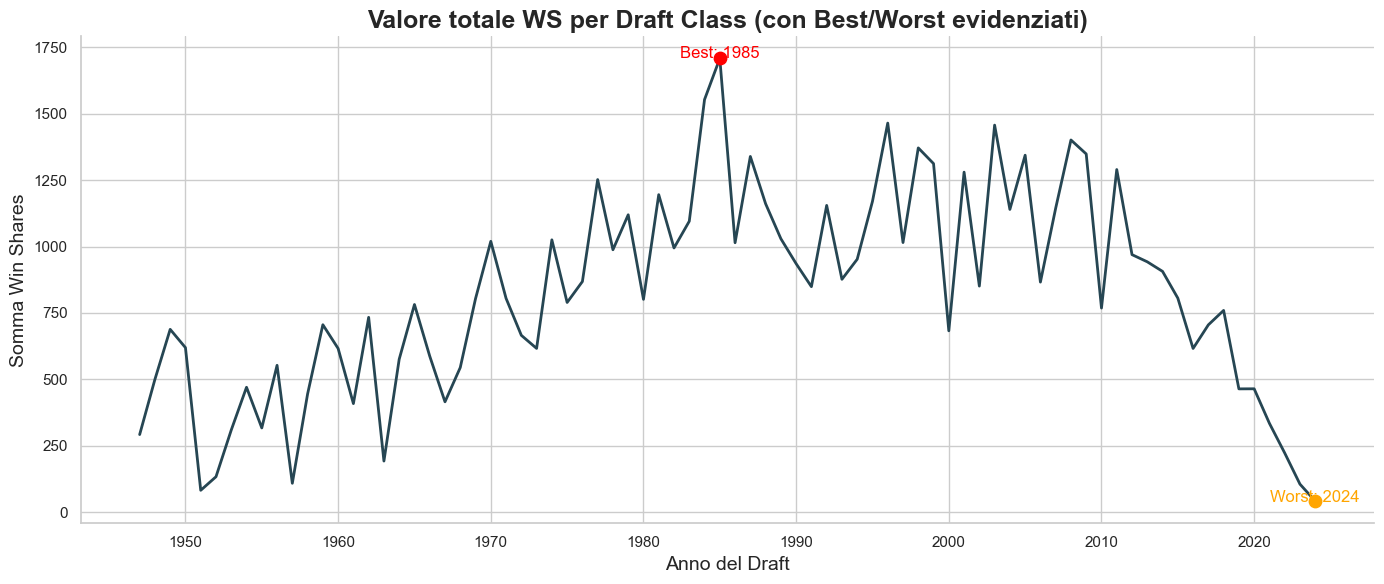

In [12]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    x=value_by_year.index,
    y=value_by_year["Total_WS"],
    linewidth=2,
    color="#264653"
)

# Evidenzia il massimo
best_year = value_by_year["Total_WS"].idxmax()
best_value = value_by_year["Total_WS"].max()
plt.scatter(best_year, best_value, color="red", s=80, zorder=5)
plt.text(best_year, best_value+3, f"Best: {best_year}", fontsize=12, color="red")

# Evidenzia il minimo
worst_year = value_by_year["Total_WS"].idxmin()
worst_value = value_by_year["Total_WS"].min()
plt.scatter(worst_year, worst_value, color="orange", s=80, zorder=5)
plt.text(worst_year, worst_value-3, f"Worst: {worst_year}", fontsize=12, color="orange")

plt.title("Valore totale WS per Draft Class ", fontsize=18)
plt.xlabel("Anno del Draft", fontsize=14)
plt.ylabel("Somma Win Shares", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


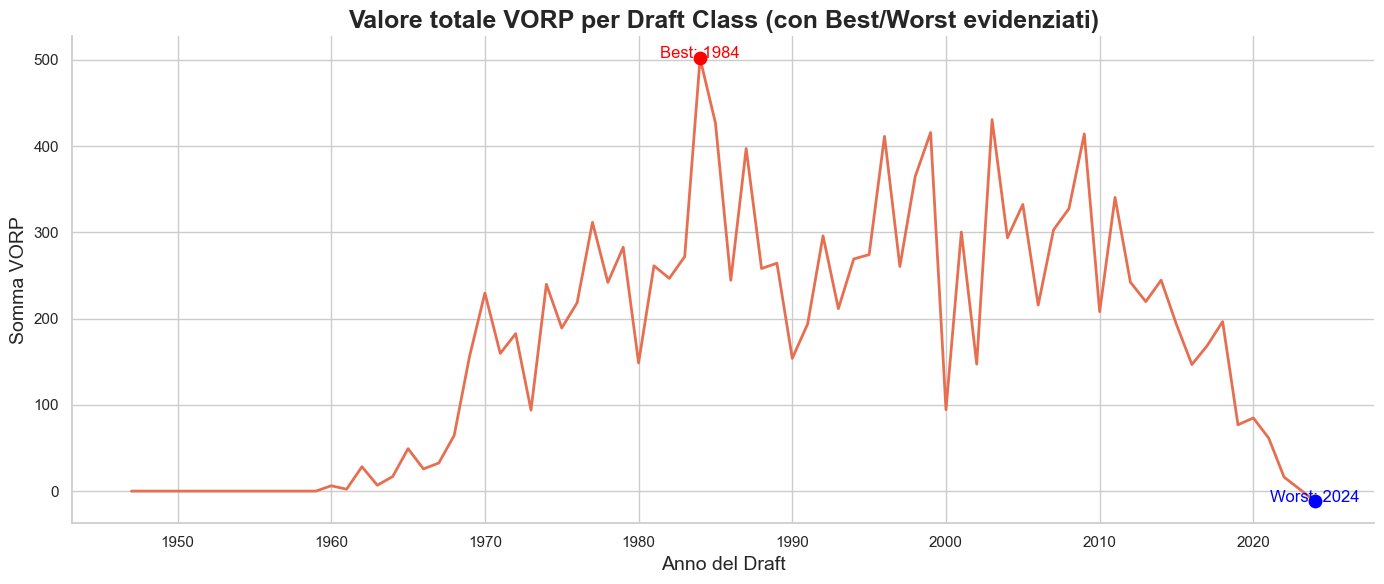

In [14]:
plt.figure(figsize=(14, 6))
sns.set_theme(style="whitegrid")

sns.lineplot(
    x=value_by_year.index,
    y=value_by_year["Total_VORP"],
    linewidth=2,
    color="#E76F51"   # arancione elegante (molto meglio dell'orange base)
)

# Evidenzia il massimo
best_year_vorp = value_by_year["Total_VORP"].idxmax()
best_value_vorp = value_by_year["Total_VORP"].max()
plt.scatter(best_year_vorp, best_value_vorp, color="red", s=80, zorder=5)
plt.text(best_year_vorp, best_value_vorp + 0.5, f"Best: {best_year_vorp}", fontsize=12, color="red", ha="center")

# Evidenzia il minimo
worst_year_vorp = value_by_year["Total_VORP"].idxmin()
worst_value_vorp = value_by_year["Total_VORP"].min()
plt.scatter(worst_year_vorp, worst_value_vorp, color="blue", s=80, zorder=5)
plt.text(worst_year_vorp, worst_value_vorp - 0.5, f"Worst: {worst_year_vorp}", fontsize=12, color="blue", ha="center")

plt.title("Valore totale VORP per Draft Class", fontsize=18, fontweight="bold")
plt.xlabel("Anno del Draft", fontsize=14)
plt.ylabel("Somma VORP", fontsize=14)

sns.despine()
plt.tight_layout()
plt.show()


In [9]:
top_ws = value_by_year.sort_values("Total_WS", ascending=False).head(10)
top_vorp = value_by_year.sort_values("Total_VORP", ascending=False).head(1)

print("Top 5 Draft Class per WS:")
print(top_ws)
print("\nTop 5 Draft Class per VORP:")
print(top_vorp)


Top 5 Draft Class per WS:
           Total_WS  Total_VORP
DraftYear                      
1985         1707.4       426.8
1984         1552.8       501.5
1996         1464.3       411.2
2003         1456.7       430.6
2008         1400.8       327.4
1998         1371.0       364.7
2009         1348.2       414.0
2005         1343.5       332.3
1987         1338.8       397.1
1999         1311.9       415.7

Top 5 Draft Class per VORP:
           Total_WS  Total_VORP
DraftYear                      
1984         1552.8       501.5


In [10]:
bottom_ws = value_by_year.sort_values("Total_WS").head(5)
bottom_vorp = value_by_year.sort_values("Total_VORP").head(5)

print("Peggiori 5 Draft Class per WS:")
print(bottom_ws)
print("\nPeggiori 5 Draft Class per VORP:")
print(bottom_vorp)


Peggiori 5 Draft Class per WS:
           Total_WS  Total_VORP
DraftYear                      
2024           42.4       -11.6
1951           83.1         0.0
2023          106.3         2.4
1957          109.5         0.0
1952          134.1         0.0

Peggiori 5 Draft Class per VORP:
           Total_WS  Total_VORP
DraftYear                      
2024           42.4       -11.6
1947          292.7         0.0
1949          688.5         0.0
1948          500.3         0.0
1951           83.1         0.0
